# My Toronto Clustering Project

#### First i copied the data from the wiki page to excel and ran the following VBA code to deal with unassigned values the way that was pointed out in the task:

```
Sub AssignedOnly()
Dim cell As Range
For Each cell In ActiveSheet.UsedRange.Columns("B").Cells
If Left(cell.Value, 5) = "Not a" Then cell.EntireRow.Delete
Next cell
End Sub
```
___________________________________________________________

```
Sub QueensPark()
Dim cell As Range
For Each cell In ActiveSheet.UsedRange.Columns("C").Cells
If Left(cell.Value, 5) = "Not a" Then cell.Value = cell.Offset(0, -1).Value
Next cell
End Sub
```

#### I placed the improved dataset in my Github repository, and that is where Pandas' turn comes

![](https://ca-times.brightspotcdn.com/dims4/default/013452e/2147483647/strip/true/crop/1968x1107+0+0/resize/840x473!/quality/90/?url=https%3A%2F%2Fca-times.brightspotcdn.com%2F22%2F95%2F424d38b9d4d89a03e4581888f9ce%2Fla-1522697963-y0ks365b7g-snap-image)

In [1]:
import pandas as pd

loc = "https://github.com/SergeyHiro/Coursera_Capstone/raw/master/Toronto.xlsx.xlsm"
Toro = pd.read_excel(loc,
header=0,
index_col=False,)

Toro.columns = ['Postcode','Borough', 'Neighborhood']

Toro = pd.DataFrame(Toro.groupby(['Postcode','Borough'], as_index = True)['Neighborhood'].apply(', '.join))
Toro.reset_index(inplace=True)

Toro.head()

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [2]:
Toro.shape

(103, 3)

#### So i move on and import the geospatial data

In [3]:
loc2 = "https://cocl.us/Geospatial_data"
GeoData = pd.read_csv(loc2,
header=0,
index_col=False,)
GeoData.rename(columns={'Postal Code':'Postcode'}, inplace=True)

GeoData.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Then i merge the two dataframes

In [247]:
# Need to clean whitespaces in order for merge to work

GeoData['Postcode']=GeoData['Postcode'].str.strip()
Toro['Postcode']=Toro['Postcode'].str.strip()

# Then merge

FinalFrame = pd.merge(Toro, GeoData, on='Postcode')
FinalFrame


,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


### Now some clustering


In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

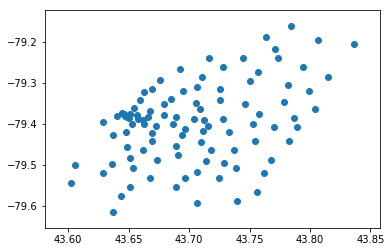

In [53]:
y = FinalFrame['Longitude']
x = FinalFrame['Latitude']
plt.scatter(x, y)
plt.show()


In [56]:
# Let's define centroids, for example Northern and Southern ones
x_cent = FinalFrame['Latitude'].mean()
x_cent

43.70413076470588

In [219]:
North = []
South = []
for x in FinalFrame['Longitude']:
    if x < FinalFrame['Longitude'].mean():
        South.append(x)
    if x > FinalFrame['Longitude'].mean():
        North.append(x)
yNorth = sum(North)/len(North)
ySouth = sum(South)/len(South)
print(ySouth, yNorth)
        

-79.47785422083335 -79.32666834814815


In [231]:
SouthCenter = np.array([x_cent, ySouth])
NorthCenter = np.array([x_cent, yNorth])
Centroids = np.array([NorthCenter, SouthCenter])
print(NorthCenter, SouthCenter)

[ 43.70413076 -79.32666835] [ 43.70413076 -79.47785422]


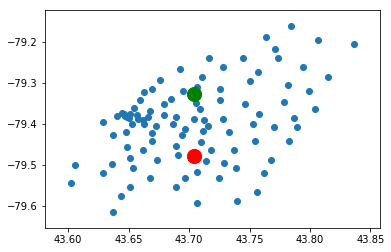

In [232]:
# Let's mark the centroids on the chart
y = FinalFrame['Longitude']
x = FinalFrame['Latitude']
plt.scatter(x, y)
plt.scatter(x_cent, ySouth, color = 'r', s = 200)
plt.scatter(x_cent, yNorth, color = 'g', s = 200)
plt.show()

#### Now we can use those centroids to predict if the neighborhood in the North or in the South

In [233]:
# Let's check if Rouge and Malvern neighborhoods are in the North or in the South
Rouge = np.array(FinalFrame[['Latitude','Longitude']][FinalFrame['Neighborhood'] == 'Rouge, Malvern'])
Rouge

array([[ 43.8066863, -79.1943534]])

In [234]:
# Finding the nearest centroid
diff = Centroids - Rouge
diff


array([[-0.10255554, -0.13231495],
       [-0.10255554, -0.28350082]])

In [235]:
dist = np.sqrt(np.sum(diff**2, axis=-1))  # Euclidean distance
closest_centroid = Centroids[np.argmin(dist)]
closest_centroid

array([ 43.70413076, -79.32666835])

The result shows that Rouge and Malvern belong to the north cluster

let's write a function

In [263]:
def FindCluster_by_Postcode(Code):
    diff = Centroids - np.array(FinalFrame[['Latitude','Longitude']][FinalFrame['Postcode'] == Code])
    dist = abs(np.sqrt(np.sum(diff**2, axis=-1)))
    closest_centroid = Centroids[np.argmin(dist)]
    print(closest_centroid)
    if list(closest_centroid) == list(NorthCenter):
        return 'North'
    else:
        return 'South'
        

#### Now we can call the function to define the position of any region in the frame

In [266]:
# for example, for Woburn neighborhood we input its postal code M1G 

FindCluster_by_Postcode('M1G')

[ 43.70413076 -79.32666835]


'North'